Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

In [37]:
import sklearn.datasets

digits = sklearn.datasets.load_digits()
X, y = digits.data, digits.target
print 'digits:', digits
print 'X:', X, X.shape
print 'y:', y, y.shape

digits: {'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16.,

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.


Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [38]:
import sklearn.tree
import sklearn.cross_validation

def cross_val_score_default(*args, **kwargs):
    if 'cv' not in kwargs:
        kwargs['cv'] = 10
    if 'X' not in kwargs:
        kwargs['X'] = X
    if 'y' not in kwargs:
        kwargs['y'] = y
    scores = sklearn.cross_validation.cross_val_score(*args, **kwargs)
    return scores

def cross_val_score_mean(*args, **kwargs):
    return cross_val_score_default(*args, **kwargs).mean()

classifier = sklearn.tree.DecisionTreeClassifier()
scores = cross_val_score_default(
    estimator=classifier,
#     X=X,
#     y=y,
)
print scores
first_answer = scores.mean()
print 'A1: ', first_answer

[0.8        0.8579235  0.83977901 0.82777778 0.79329609 0.88826816
 0.86592179 0.8258427  0.83615819 0.81818182]
A1:  0.835314902099138


2. Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [39]:
import sklearn.ensemble

classifier = sklearn.ensemble.BaggingClassifier(n_estimators=100)
scores = cross_val_score_default(estimator=classifier)
print scores
second_answer = scores.mean()
print 'A2: ', second_answer

[0.88108108 0.95081967 0.9281768  0.94444444 0.92178771 0.98882682
 0.96089385 0.91011236 0.88135593 0.92613636]
A2:  0.9293635028515366


3. Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на \sqrt{d} 
d
​	  случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [40]:
import numpy as np
max_features = int(np.sqrt(X.shape[1]))
print max_features
classifier = sklearn.ensemble.BaggingClassifier(
    n_estimators=100,
    max_features=max_features,
)
scores = cross_val_score_default(estimator=classifier)
print scores
third_answer = scores.mean()
print 'A3: ', third_answer

8
[0.90810811 0.95081967 0.93922652 0.91111111 0.91620112 0.93296089
 0.94413408 0.98876404 0.9039548  0.92045455]
A3:  0.9315734892731109


4. Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же \sqrt{d} 
d
​	  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.


In [41]:
classifier = sklearn.ensemble.BaggingClassifier(
    base_estimator=sklearn.tree.DecisionTreeClassifier(
        max_features=max_features
    ),
    n_estimators=100,
)
scores = cross_val_score_default(estimator=classifier)
print scores
forth_answer = scores.mean()
print 'A4: ', forth_answer

[0.91351351 0.9726776  0.93922652 0.94444444 0.94972067 0.97765363
 0.98324022 0.96067416 0.92655367 0.93181818]
A4:  0.9499522609500991


5. Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.



In [42]:
classifier = sklearn.ensemble.RandomForestClassifier(
    n_estimators=100,
    max_features=max_features,
)
scores = cross_val_score_default(estimator=classifier)
print scores
forth_answer = scores.mean()
print 'A5*: ', forth_answer

[0.92972973 0.97814208 0.9281768  0.96111111 0.96089385 0.97765363
 0.96648045 0.96629213 0.93220339 0.9375    ]
A5*:  0.9538183170546546


[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96] [0.7588351212699267, 0.8848993900506189, 0.9265974824418232, 0.9338622693677333, 0.9372008280866769, 0.9310005714777916, 0.9483759605801989, 0.9483029162734219, 0.9477026851692987, 0.9533435612571806, 0.9494865496489311, 0.9511055777580142, 0.9471376355386086, 0.9483353158347821, 0.9493876455069723, 0.949427419418225, 0.9555275820455641, 0.9556043416870474, 0.9544784935277193, 0.9516463034112664]


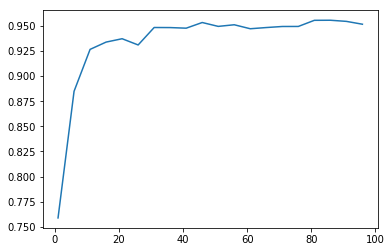

In [54]:
import matplotlib.pyplot as plt

def train_range_plot(param, value_from, value_to, step):
    x = np.arange(value_from, value_to, step)
    y = [
        cross_val_score_mean(
            estimator=sklearn.ensemble.RandomForestClassifier(**{param: value})
        ) for value in x
    ]
    print x, y
    plt.plot(x, y)

train_range_plot('n_estimators', 1, 100, 5)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] [0.8804927218120315, 0.8959165416127522, 0.8988426095058969, 0.9106413476431208, 0.9211678128303751, 0.9249904473601213, 0.9199620539380075, 0.9143850242265217, 0.9200293116704451, 0.9161289272910788, 0.9225785584743216, 0.918070264428483, 0.9200067667967682, 0.9214474613978648, 0.9138078082191129, 0.9238245264298612, 0.9215275607020097, 0.9199107466855228, 0.9232303158755043, 0.923327725347078, 0.9160433596948028, 0.9133263728194567, 0.916776173023344, 0.9244040620224372, 0.919893059002354, 0.9116436848090105, 0.9205442852993706, 0.9171452717950483, 0.9099902644097793, 0.9276361458060555, 0.9110822100253975, 0.9239461465947392, 0.9176383382595699, 0.9155093668987087, 0.9171223561632859, 0.9201140375742888, 0.9267670285563359, 0.9221102245883397, 0.9105320100682771, 0.9131440958262838, 0.91008429

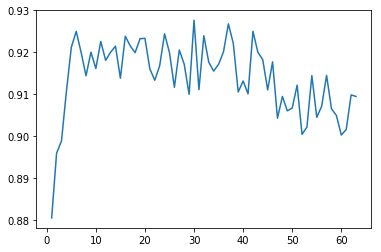

In [55]:
train_range_plot('max_features', 1, 64, 1)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99] [0.5236361289131303, 0.749507301801616, 0.869839164766198, 0.9071471045873463, 0.9192799579304254, 0.9160633010222107, 0.9271979452290061, 0.9210897214420442, 0.9130976714662771, 0.9198968191182768, 0.9159721576527982, 0.917082447083376, 0.918174638819188, 0.9138998003714948, 0.9216343878751699, 0.9143990556424226, 0.9171168884766441, 0.9310956425981125, 0.9205323474859775, 0.9221511100197881, 0.9138095011575033, 0.9178319503388253, 0.9177053554860028, 0.9203785112033357, 0.9198518845996851, 0.9238107365306455, 0.9183124333292986, 0.9222211387286153, 0.9176204241412833, 0.9182619528209326, 0.9143193224654593, 0.9193708466131538, 0.9171773726849188, 0.9097753138171083, 0.9254665489609714, 0.9238795423064475, 0.9292463150297557, 0.926671241555806, 0.9188336804355961, 0.9248678870684109, 0.921574145940759, 0.9226592741349073, 0.921008099

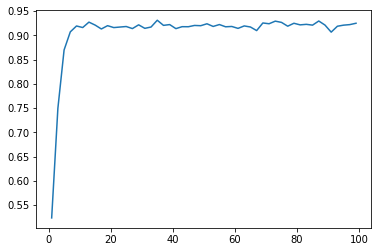

In [56]:
train_range_plot('max_depth', 1, 100, 2)

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [58]:
fifth_answer = ' '.join(map(str, [2, 3, 4, 7]))

In [61]:
def write_answer(num, value):
    with open("bagging-forest-answer%s.txt" % num, "w") as fout:
        fout.write(str(value))

def write_answers(*values):
    for num, value in enumerate(values, start=1):
        write_answer(num=num, value=value)

write_answers(
    first_answer,
    second_answer,
    third_answer,
    forth_answer,
    fifth_answer,
)   